In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def read_csv(filename):
  df = pd.read_csv(filename)
  return df

sb_ratings = read_csv('dat/super-bowl-ratings.csv')
sb_dat = read_csv('dat/superbowl_2.csv')
sb_off_stats = read_csv('dat/superbowloffensivestats.csv')
sb_mvps = read_csv('dat/mvpsb.csv')

#print(sb_dat.head(5))
#print(sb_ratings.head(5))
#print(sb_off_stats.head(5))

In [10]:
#Calculate the average winning and losing points across all Super Bowls.
average_winner_points = sb_dat['Winning Pts'].mean()
average_loser_points = sb_dat['Losing Pts'].mean()

print(average_winner_points)
print(average_loser_points)

30.423076923076923
16.384615384615383


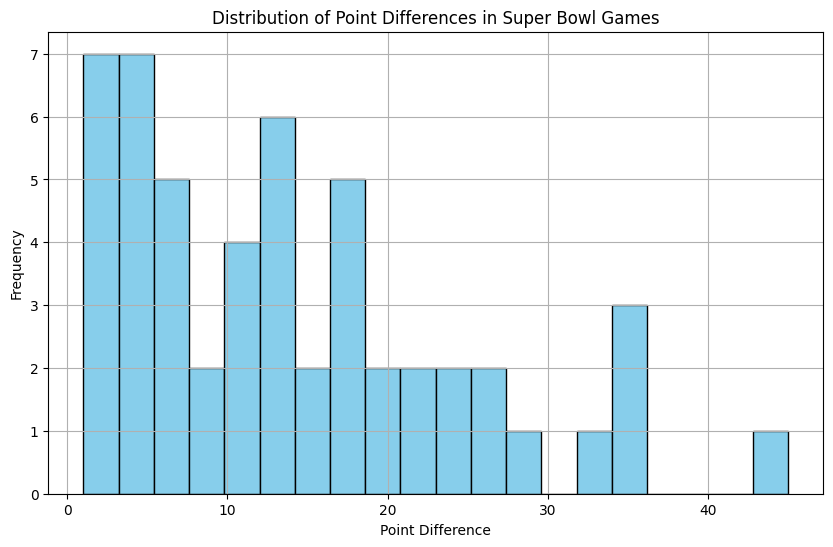

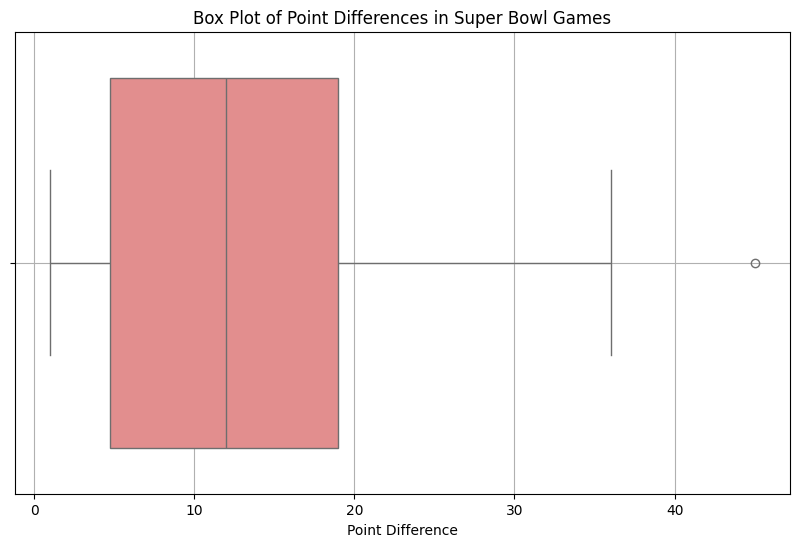

In [14]:
# Create visualizations to show the distribution of point differences in Super Bowl games.

point_differences = sb_dat['Winning Pts'] - sb_dat['Losing Pts']

# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(point_differences, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Point Difference')
plt.ylabel('Frequency')
plt.title('Distribution of Point Differences in Super Bowl Games')
plt.grid(True)
plt.show()

# Create a box plot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=point_differences, color='lightcoral')
plt.xlabel('Point Difference')
plt.title('Box Plot of Point Differences in Super Bowl Games')
plt.grid(True)
plt.show()


In [19]:
#Number of wins
winning_teams = sb_dat['Winner'].value_counts().reset_index()
winning_teams.columns = ['Team', 'Wins']
winning_teams = winning_teams.sort_values(by='Wins', ascending=False)
winning_teams.head()

,Team,Wins
0,Pittsburgh Steelers,6
2,San Francisco 49ers,5
3,New England Patriots,5
1,Dallas Cowboys,5
4,Green Bay Packers,4


In [18]:
losing_teams = sb_dat['Loser'].value_counts().reset_index()
losing_teams.columns = ['Team', 'Losses']
losing_teams = losing_teams.sort_values(by='Losses', ascending=False)
losing_teams.head()

,Team,Losses
0,New England Patriots,5
1,Denver Broncos,5
2,Minnesota Vikings,4
3,Buffalo Bills,4
4,Dallas Cowboys,3


In [22]:
#Analyze which teams have the most Super Bowl wins and losses.
team_summary = pd.merge(winning_teams, losing_teams, on='Team', how='outer')
team_summary = team_summary.fillna(0)  # Fill NaN values with 0 for teams with only wins or losses
team_summary['Wins'] = team_summary['Wins'].astype(int)
team_summary['Losses'] = team_summary['Losses'].astype(int)

team_summary['Total Games'] = team_summary['Wins'] + team_summary['Losses']
team_summary = team_summary.sort_values(by='Wins', ascending=False)
team_summary.head()

,Team,Wins,Losses,Total Games
0,Pittsburgh Steelers,6,2,8
2,New England Patriots,5,5,10
3,Dallas Cowboys,5,3,8
1,San Francisco 49ers,5,1,6
4,Green Bay Packers,4,1,5
